<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

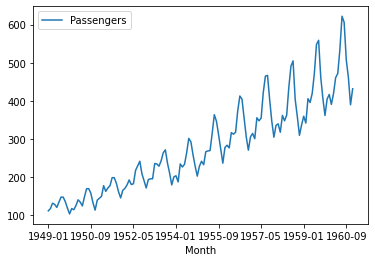

In [4]:
import pandas as pd
from matplotlib import pyplot
ap=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
ap1=ap.set_index('Month')
ap1.plot()
pyplot.show()


In [8]:
ap1

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


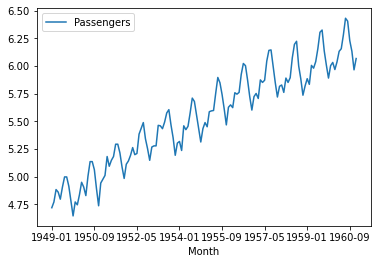

In [15]:
import numpy as np
ap1=np.log(ap1)
ap1.plot()

In [16]:
#Testing for Stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(ap1['Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Ho:Series is not stationary

Ha:Series is stationary

If significance level(alpha) is 5%, what is the decision?

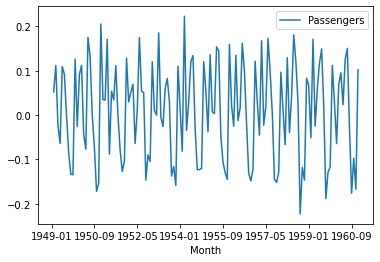

In [17]:
#Take differnce for making stationary
dap = ap1 - ap1.shift(1)
dap.plot()

In [19]:
from statsmodels.tsa.stattools import adfuller
dap=dap.dropna()
result = adfuller(dap['Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.717131
p-value: 0.071121
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579


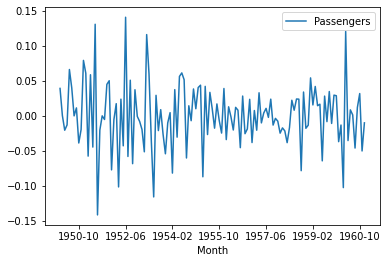

In [20]:
dap = dap - dap.shift(12)
dap.plot()

Q:Is there a seasonality in the data?

In [21]:
from statsmodels.tsa.stattools import adfuller
dap=dap.dropna()
result = adfuller(dap['Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.443325
p-value: 0.000249
Critical Values:
	1%: -3.487
	5%: -2.886
	10%: -2.580


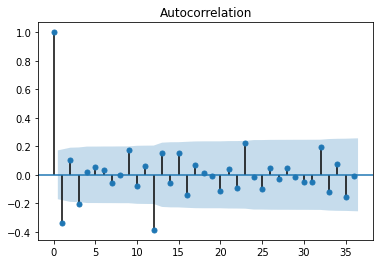

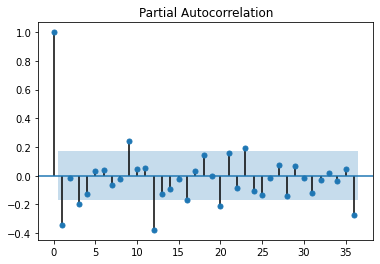

In [22]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

fig = tsaplots.plot_acf(dap['Passengers'], lags=36)
plt.show()
fig = tsaplots.plot_pacf(dap['Passengers'], lags=36)
plt.show()


In [ ]:
Ho:Series is not stationary

Ha:Series is stationary

If significance level(alpha) is 5%, what is the decision?

In [6]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(ap1['Passengers'],order=(1,1,1), seasonal_order=(0,1,1,12))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -507.448
Date:                            Fri, 06 May 2022   AIC                           1022.896
Time:                                    07:07:02   BIC                           1034.397
Sample:                                01-01-1949   HQIC                          1027.570
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2436      0.389     -0.626      0.531      -1.006       0.519
ma.L1         -0.0579      0.369     -0.157      0.875      -0.782       0.666
ma.S.L12      -0.1039      0.094     -1.109      0.267      -0.287       0.080
sigma2       135.3306     15.232      8.885      0.000     105.476     165.185
===================================================================================
Ljung-Box (Q):                       57.19   Jarque-Bera (JB):                 7.93
Prob(Q):                              0.04   Prob(JB):                         0.02
Heteroskedasticity (H):               2.55   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(ap1['Passengers'],order=(0,1,1), seasonal_order=(0,1,1,12))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -507.501
Date:                            Fri, 06 May 2022   AIC                           1021.003
Time:                                    07:07:23   BIC                           1029.628
Sample:                                01-01-1949   HQIC                          1024.507
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3087      0.068     -4.507      0.000      -0.443      -0.174
ma.S.L12      -0.1075      0.091     -1.184      0.236      -0.285       0.070
sigma2       135.4237     15.443      8.769      0.000     105.156     165.691
===================================================================================
Ljung-Box (Q):                       59.10   Jarque-Bera (JB):                 5.93
Prob(Q):                              0.03   Prob(JB):                         0.05
Heteroskedasticity (H):               2.60   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


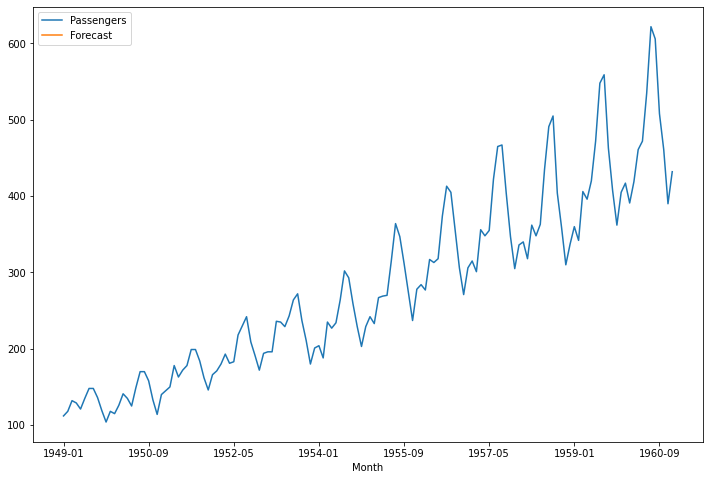

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(ap1['Passengers'],order=(0,1,1), seasonal_order=(0,1,1,12))
results=model.fit()
ap1['Forecast']=results.predict(start=120,end=144,dynamic=True)
ap1[['Passengers','Forecast']].plot(figsize=(12,8))

In [14]:
ap1

,Passengers,Forecast
Month,,
1949-01,112,NaN
1949-02,118,NaN
1949-03,132,NaN
1949-04,129,NaN
1949-05,121,NaN
...,...,...
1960-08,606,NaN
1960-09,508,NaN
1960-10,461,NaN
